In [1]:
import numpy as np
import pandas as pd

#Modelling Algorithms
from sklearn.linear_model import LogisticRegression


#Modelling helper
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/Users/lana/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lana/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## 1. Load Data

* There are null values ' ' in 'TotalCharges' column 

In [2]:
churn=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=[' '])

## 2. Data Cleaning

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

* There are 11 null values in 'TotalCharges' column and since 11 is a small number comparing with the whole dataset, it is reasonble to just drop these rows

In [4]:
# Drop rows which 'TotalCharges' are ' '
churn.dropna(inplace=True)

In [5]:
# Convert int int to object for 'SeniorCitizen' columns
churn['SeniorCitizen']=pd.Categorical(churn['SeniorCitizen'])

In [6]:
del churn['customerID']

## 3. Statistical summaries

In [7]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
numerics=['float64', 'int64']
# numeric_ds=churn.select_dtypes(include=numerics)
objects_ds=churn.select_dtypes(exclude=numerics)

#### Summary of categorical features 

In [9]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [10]:
# objects_ds.describe().T.index

In [11]:
# len(objects_ds.describe().T.index)

#### Summary of numerical features 

In [12]:
churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [14]:
print(churn.groupby('Churn').size())

Churn
No     5163
Yes    1869
dtype: int64


## 4. Graphical Analysis

#### 4.1 Comparing Tenure, MonthlyCharges and TotalCharges  (numerical data) with Chrun
* Tenure: Number of months the customer has stayed with the company;
* Monthly Charges: The amount charged to the customer monthly;
* Total Charges: The total amount charged to the customer.

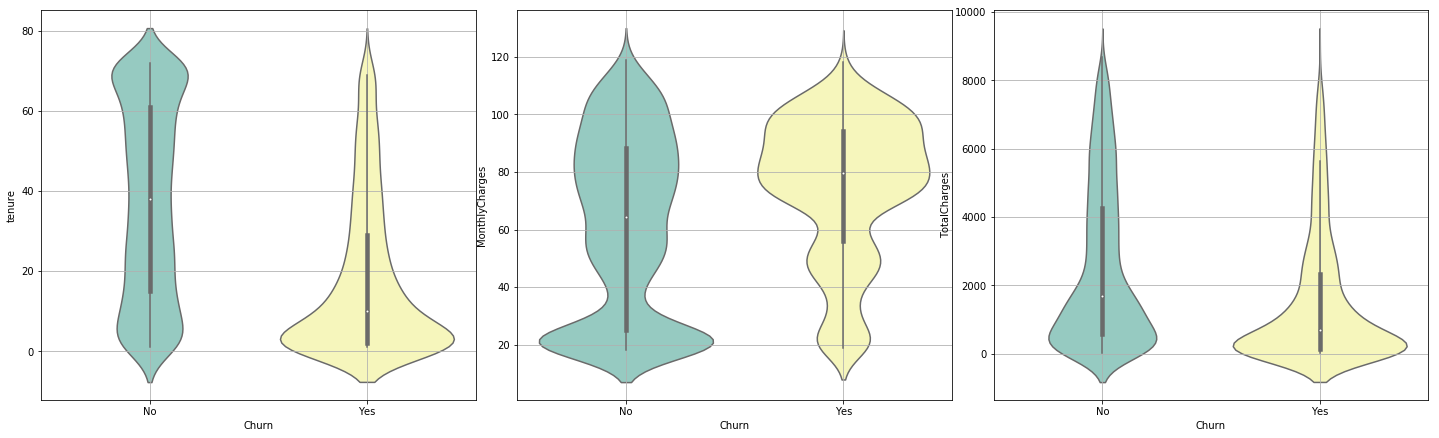

In [15]:
fig, ax =plt.subplots(1, 3, figsize=(20,6))
fig.tight_layout()
ax[0]=plt.subplot2grid((1,3),(0,0))
ax[1]=plt.subplot2grid((1,3),(0,1))
ax[2]=plt.subplot2grid((1,3),(0,2))
sns.violinplot(x='Churn', y='tenure', data=churn, palette="Set3", ax=ax[0])
sns.violinplot(x='Churn', y='MonthlyCharges', data=churn, palette="Set3", ax=ax[1])
sns.violinplot(x='Churn', y='TotalCharges', data=churn, palette="Set3", ax=ax[2])
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

* Customers with shorter tenure or had higher monthly fee would have more possiblity leave the company.

#### 4.2 Comparing categorical features with Chrun

In [16]:
categorical=objects_ds.describe().T.index

#### We can see from the plots that customers with features listed below have larger possibility leaving the company：
* Do not have Partner or do not add some additional service like device protection or online security, using Fiber optic Internet Service, using Month-to-month Contract

#### Also, feature like gender does not influence the possibility of chrun


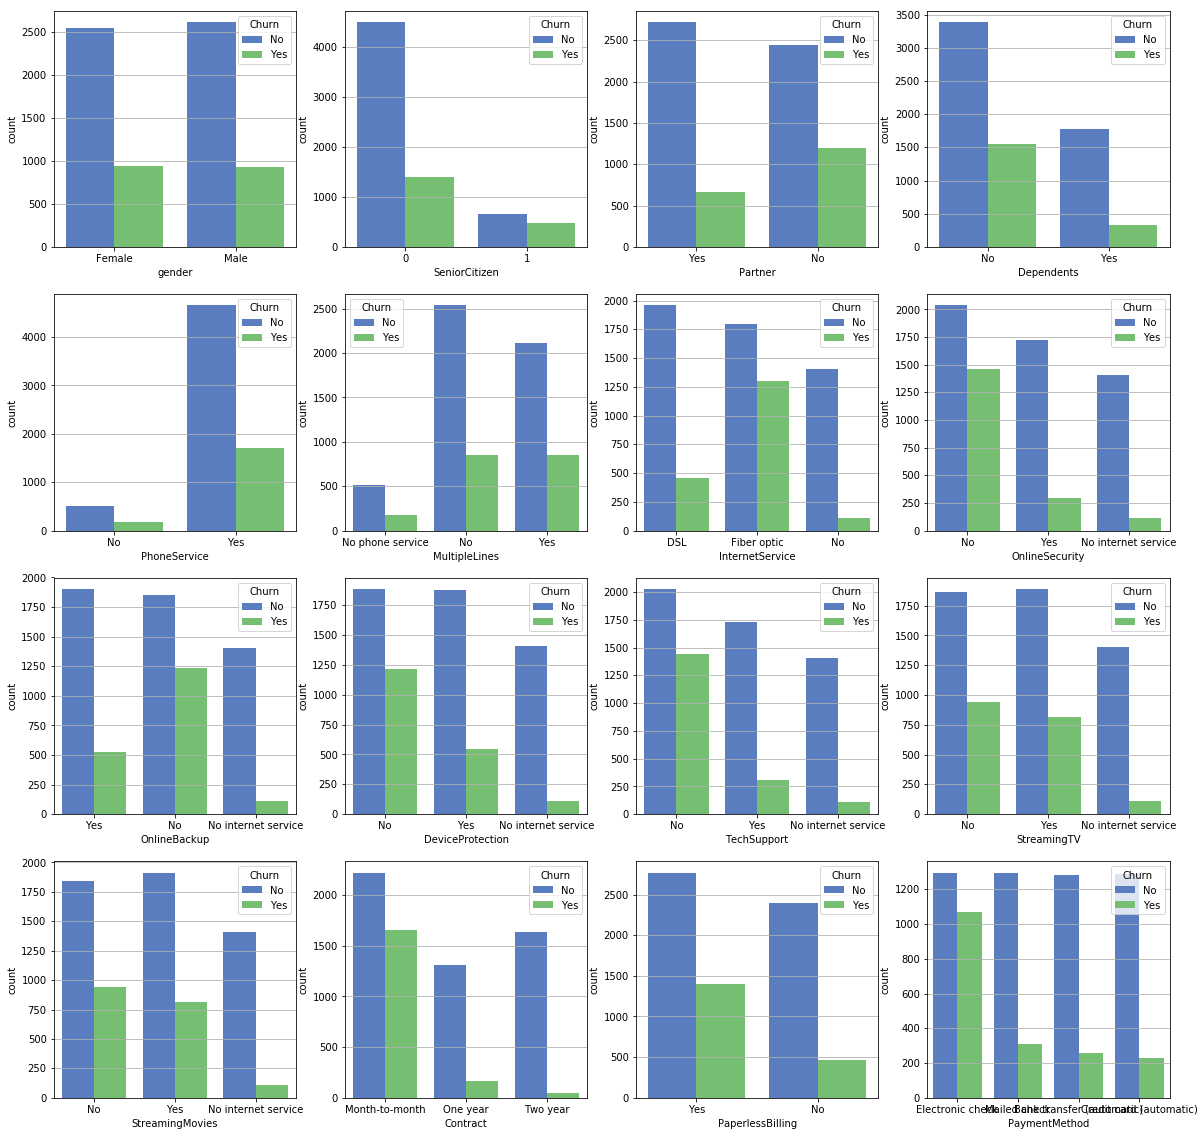

In [17]:
fig, ax = plt.subplots(4, 4, figsize=(20,20))
# fig.tight_layout()
ax = ax.flatten()
i=0
while i <= (len(categorical)-2):
    ax[i].grid(True)
    sns.countplot(x=categorical[i],hue='Churn',data=churn, palette='muted', ax=ax[i])
    i=i+1

## 5. Data Preparation

#### 5.1 Create dummy variables for categorical features

In [54]:
categorical_churn=pd.DataFrame()
for i in list(range(0,len(objects_ds.describe().T.index)-1)):
    name=objects_ds.describe().T.index[i]
    name=pd.get_dummies(churn[name], prefix=name)
    categorical_churn=pd.concat([categorical_churn,name], axis=1)

In [55]:
# pd.DataFrame(categorical_churn.columns)
categorical_churn.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


#### 5.2 Convert numerical features to categorical features
* Based on the violin plots in the front

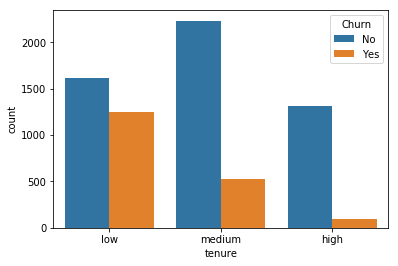

In [65]:
tenure=pd.cut(churn['tenure'], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure, hue="Churn", data=churn)

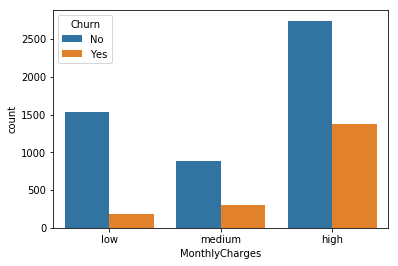

In [66]:
MonthlyCharges=pd.cut(churn['MonthlyCharges'], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges, hue='Churn', data=churn)

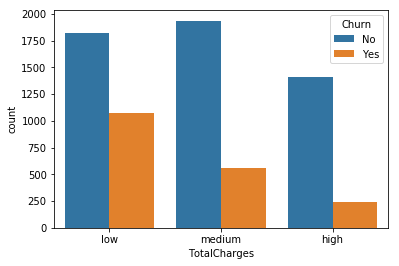

In [67]:
TotalCharges=pd.cut(churn['TotalCharges'], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges, hue='Churn', data=churn);

In [71]:
numerical_cate=pd.DataFrame([tenure, MonthlyCharges, TotalCharges]).T
numerical_cate.head()

,tenure,MonthlyCharges,TotalCharges
0,low,low,low
1,medium,medium,medium
2,low,medium,low
3,medium,medium,medium
4,low,high,low


#### Create dummy variables

In [79]:
numerical_dummy=pd.DataFrame()
for i in list(range(0,len(numerical_cate.describe().T.index))):
    name=numerical_cate.describe().T.index[i]
    name=pd.get_dummies(numerical_cate[name], prefix=name)
    numerical_dummy=pd.concat([numerical_dummy,name], axis=1)

In [81]:
numerical_dummy.head()

,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,TotalCharges_high,TotalCharges_low,TotalCharges_medium
0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,1,0,0,1
4,0,1,0,1,0,0,0,1,0


## 6. Create dataset

#### 6.1 Data set 1 (keep original numerical features)

In [20]:
full_X=pd.concat([categorical_churn,
                  churn[['tenure','MonthlyCharges','TotalCharges']]], axis=1)

In [21]:
full_X.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,29.85,29.85
1,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,2,53.85,108.15
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,2,70.70,151.65


In [22]:
full_y=pd.Series(np.where(churn['Churn']=='Yes',1,0), name='Churn')
full_y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [90]:
train_x, valid_x, train_y, valid_y =train_test_split(full_X, full_y, test_size=0.30, random_state=10)

In [91]:
print(train_x.shape, valid_x.shape, train_y.shape, valid_y.shape)

(4922, 46) (2110, 46) (4922,) (2110,)


#### 6.2 Data set 2 (Convert numerical features to categorical features)

In [84]:
full_X2=pd.concat([categorical_churn,numerical_dummy], axis=1)
full_X2.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Mailed check,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,TotalCharges_high,TotalCharges_low,TotalCharges_medium
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
3,0,1,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [83]:
full_y2=pd.Series(np.where(churn['Churn']=='Yes',1,0), name='Churn')
full_y2.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [88]:
train_x2, valid_x2, train_y2, valid_y2 =train_test_split(full_X2, full_y2, test_size=0.30, random_state=10)

In [89]:
print(train_x2.shape, valid_x2.shape, train_y2.shape, valid_y2.shape)

(4922, 52) (2110, 52) (4922,) (2110,)


## 7. Logistic Regression

#### 7.1 Logistic Regression without penalty (input data: data set 1)
* Using grid search to find the best parameter C

In [96]:
logmodel = LogisticRegression()
parameter_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search1 = GridSearchCV(logmodel, param_grid=parameter_grid, cv=10)
grid_search1.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [97]:
print('Best score: {:.4f}'.format(grid_search1.best_score_))
print('Best parameters: {}'.format(grid_search1.best_params_))

Best score: 0.8048
Best parameters: {'C': 0.01}


#### 7.2 Logistic Regression with L1 penalty (input data: data set 1)
* Using grid search to find the best parameter C

In [98]:
logmodel2 = LogisticRegression(penalty='l1')
parameter_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search2 = GridSearchCV(logmodel2, param_grid=parameter_grid, cv=10)
grid_search2.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [99]:
print('Best score: {:.4f}'.format(grid_search2.best_score_))
print('Best parameters: {}'.format(grid_search2.best_params_))

Best score: 0.8021
Best parameters: {'C': 0.1}


#### 7.3 Logistic Regression without penalty (input data: data set 2)
* Using grid search to find the best parameter C

In [100]:
logmodel3 = LogisticRegression()
parameter_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search3 = GridSearchCV(logmodel3, param_grid=parameter_grid, cv=10)
grid_search3.fit(train_x2,train_y2)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [101]:
print('Best score: {:.4f}'.format(grid_search3.best_score_))
print('Best parameters: {}'.format(grid_search3.best_params_))

Best score: 0.7968
Best parameters: {'C': 0.1}


#### 7.4 Logistic Regression with L1 penalty (input data: data set 2)
* Using grid search to find the best parameter C

In [103]:
logmodel4 = LogisticRegression(penalty='l1')
parameter_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search4 = GridSearchCV(logmodel4, param_grid=parameter_grid, cv=10)
grid_search4.fit(train_x2,train_y2)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [104]:
print('Best score: {:.4f}'.format(grid_search4.best_score_))
print('Best parameters: {}'.format(grid_search4.best_params_))

Best score: 0.7952
Best parameters: {'C': 1}


#### 7.5 Using cross validation to find the best Algorithm

#### 7.5.1 Build cross validation models

In [169]:
kfold=KFold(n_splits=10, random_state=10)
results=[]
cv=pd.DataFrame(columns=['Algoruthm','Score_mean','Score_std'])

In [170]:
logmodel = LogisticRegression(C=0.1)
cv_logmodel=cross_val_score(logmodel, train_x,train_y, cv=kfold, scoring = 'accuracy')
results.append(cv_logmodel)
mean=cv_logmodel.mean()
std=cv_logmodel.std()
cv.loc[len(cv)]=['Logistic Regression_1',mean,std]

In [171]:
logmodel2 = LogisticRegression(C=0.1, penalty='l1')
cv_logmodel2=cross_val_score(logmodel2, train_x,train_y, cv=kfold, scoring = 'accuracy')
results.append(cv_logmodel2)
mean=cv_logmodel2.mean()
std=cv_logmodel2.std()
cv.loc[len(cv)]=['Logistic Regression_2',mean,std]

In [172]:
logmodel3 = LogisticRegression(C=0.1)
cv_logmodel3=cross_val_score(logmodel3, train_x2,train_y2, cv=kfold, scoring = 'accuracy')
results.append(cv_logmodel3)
mean=cv_logmodel3.mean()
std=cv_logmodel3.std()
cv.loc[len(cv)]=['Logistic Regression_3',mean,std]

In [173]:
logmodel4 = LogisticRegression(C=1, penalty='l1')
cv_logmodel4=cross_val_score(logmodel4, train_x2,train_y2, cv=kfold, scoring = 'accuracy')
results.append(cv_logmodel4)
mean=cv_logmodel4.mean()
std=cv_logmodel4.std()
cv.loc[len(cv)]=['Logistic Regression_4',mean,std]

#### 7.6 Visualize cross validation outcomes

               Algoruthm  Score_mean  Score_std
0  Logistic Regression_1    0.799876   0.016241
1  Logistic Regression_2    0.802312   0.019830
2  Logistic Regression_3    0.797024   0.020881
3  Logistic Regression_4    0.795399   0.019917


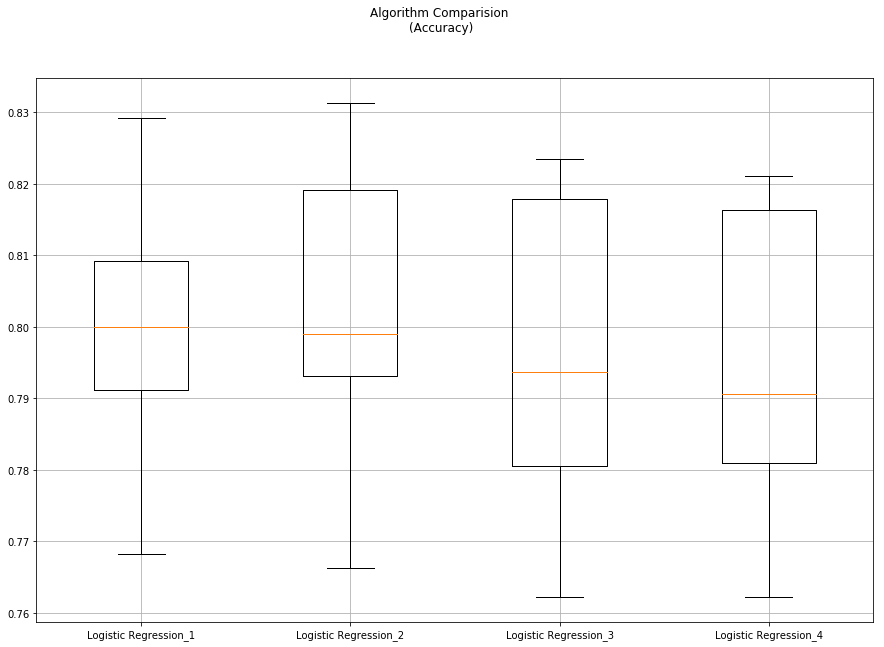

In [174]:
names=['Logistic Regression_1', 'Logistic Regression_2', 'Logistic Regression_3','Logistic Regression_4']
fig=plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparision \n(Accuracy)')
ax=fig.add_subplot(111)
plt.boxplot(results)
# plt.plot(cv.Algoruthm, cv.Score_mean)
plt.grid(True)
ax.set_xticklabels(names)
print(cv)

### Therefore, the second logistic regression performance better than the other three models
* The second one is logistic regression applying L1 penalty and the input data is data set 1

#### 7.7 Model Evaluation

In [176]:
logmodel2 = LogisticRegression(C=0.1, penalty='l1').fit(train_x,train_y)

In [244]:
predictions = logmodel2.predict(valid_x)
print(classification_report(valid_y,predictions))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1551
          1       0.66      0.56      0.61       559

avg / total       0.80      0.81      0.80      2110



* Features selected by L1 penalty and their corresponding coefficients：

In [243]:
coef=logmodel2.coef_.reshape(46,)
column=list(train_x.columns)
coeff_df = pd.DataFrame([coef,column]).T
coeff_df.columns=['coefficient', 'features']
coeff_df=coeff_df[['features','coefficient']]
coeff_df[coeff_df['coefficient']!=0].sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,features,coefficient
0,InternetService_Fiber optic,0.534577
1,Contract_Month-to-month,0.477973
2,OnlineSecurity_No,0.349845
3,PaymentMethod_Electronic check,0.235048
4,TechSupport_No,0.190547
5,StreamingTV_Yes,0.178778
6,StreamingMovies_Yes,0.127376
7,OnlineBackup_No,0.0617483
8,TotalCharges,0.000383
9,InternetService_No,-1.45394e-05


## 8. Predict the probality the clients leaving or not

In [246]:
coef=logmodel2.coef_.reshape(46,)
coef

array([ 0.00000000e+00, -2.16284031e-02, -2.82347542e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.06676102e-01,
        0.00000000e+00, -3.27161045e-01, -2.16078257e-01,  0.00000000e+00,
        0.00000000e+00, -1.10684419e-01,  5.34576504e-01, -1.45393882e-05,
        3.49844815e-01,  0.00000000e+00, -4.98165455e-02,  6.17482818e-02,
       -4.00713311e-01, -6.42317160e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.90547025e-01,  0.00000000e+00, -1.56403510e-01,
        0.00000000e+00,  0.00000000e+00,  1.78777819e-01, -1.80249272e-04,
       -4.76052409e-05,  1.27376425e-01,  4.77973135e-01, -8.49493921e-04,
       -4.65608864e-01, -3.17595088e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.35048346e-01, -4.53780604e-02, -6.73142687e-02,
       -2.69942033e-03,  3.82999878e-04])

In [ ]:
test= np.std()